In [1]:
import data_outcomes as data
import data_models

# Dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import datetime
import numpy as np
from scipy.stats import zscore
import scipy.stats as stats

### Loading original dataset as dataframe

In [2]:
df = data.getDiabetesDataDataframe()
display(df.head())

----> Retrieving information for Resources/diabetes.csv
----> Renaming DiabetesPedigreeFunction column to FamilyHistory
----> Mean will be substituted for 0 values
----> 121 substituted for 0 values in Glucose
----> 72 substituted for 0 values in BloodPressure
----> 29 substituted for 0 values in SkinThickness
----> 155 substituted for 0 values in Insulin
----> 32 substituted for 0 values in BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistory,Age,Outcome
0,6,148,72,35,155,33,0.627,50,1
1,1,85,66,29,155,26,0.351,31,0
2,8,183,64,29,155,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1


### Loading new data set as dataframe

In [3]:
dfb = data.getDiabetesBehaviorDataframe()
display(dfb.head())

----> Retrieving information for Resources/diabetes_data.csv


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
models = [
        LogisticRegression(random_state=42),
        KNeighborsClassifier(n_neighbors=27),
        GradientBoostingClassifier(random_state=42),
        AdaBoostClassifier(random_state=42)
    ]

dict = data_models.model_selector(dfb, models)


------------ Running predictions for LogisticRegression(random_state=42)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for KNeighborsClassifier(n_neighbors=27)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for GradientBoostingClassifier(random_state=42)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for AdaBoostClassifier(random_state=42)  --------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing all features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing dropping features
Returning all features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [5]:
for mdl in dict:
    met = dict[mdl]
    for key in met:
        print(f'{key}: {met[key]}')

model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
train_score: 0.7604640661363715
test_score: 0.7601333750130249
test_metrics: {'model': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'accuracy': 0.7601333750130249, 'confusion_matrix': array([[3459, 1144],
       [1158, 3836]]), 'classification_report': '              precision    recall  f1-score   support\n\n           1       0.75      0.75      0.75      4603\n           0       0.77      0.77      0.77      4994\n\n    accuracy                           0.76      9597\n   macro avg       0.76      0.76      0.76      9597\nweighted avg       0.76      0.76      0.76      9597\n', 'balanced_accuracy_score': 0.7597940905145266}
model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
train_score: 0.7653270346312828
test_score: 0.7542982181931853
test_metrics: {'model': <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, 'accuracy': 0.7542982181931853, 'confusion_matrix': ar

### Creating the Test Train Split and Scale the data

In [4]:
# Split training and testing sets
# Create the features DataFrame, X
X = dfb.copy()
X = X.drop(columns=['Diabetes'])
y = dfb['Diabetes']

In [5]:
display(X.head())

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:


# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)




### Create Logistic Regression Model

In [16]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

# Generate predictions from the model we just fit
training_predictions = logistic_regression_model.predict(X_train_scaled)

# Convert those predictions (and actual values) to a DataFrame
training_results_df = pd.DataFrame({"Prediction": training_predictions, "Actual": y_train})

# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Save both the test predictions and actual test values to a DataFrame
testing_results = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

Training Data Score: 0.7580673173781652
Testing Data Score: 0.7656559341460873


In [8]:
#lr = sm.Logit(y_train, X_train_scaled).fit(method='bfgs')
#lr.pvalues.sort_values()
#lr.pvalues

### Logistic Regression metrics

In [9]:
accuracy = accuracy_score(y_test, testing_predictions)
confusion = confusion_matrix(y_test, testing_predictions, labels=[1,0])
classification = classification_report(y_test, testing_predictions, labels = [1, 0])
balanced_accuracy = balanced_accuracy_score(y_test, testing_predictions)
r2 = r2_score(y_test, testing_predictions)
cross_val = cross_val_score(LogisticRegression(), X_train_scaled, y_train, scoring = "r2")


In [10]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)
adj_score = r2_adj(X_test_scaled, y_test, logistic_regression_model)

In [11]:
print(f'accuracy: {accuracy}')
print(f'confusion: {confusion}')
print(f'classification: {classification}')
print(f'balanced_accuracy: {balanced_accuracy}')
print(f'r2: {r2}')
print(f'r2_adj: {adj_score}')
print(f'cross_val: {cross_val}')

accuracy: 0.7656559341460873
confusion: [[3487 1118]
 [1131 3861]]
classification:               precision    recall  f1-score   support

           1       0.76      0.76      0.76      4605
           0       0.78      0.77      0.77      4992

    accuracy                           0.77      9597
   macro avg       0.77      0.77      0.77      9597
weighted avg       0.77      0.77      0.77      9597

balanced_accuracy: 0.7653289562975027
r2: 0.06109697339848008
r2_adj: 0.7652400400945667
cross_val: [0.02928281 0.01675743 0.04737503 0.02652704 0.04026291]


### Finding the best K for a KNN model

k: 1, Train/Test Score: 0.973/0.677
k: 3, Train/Test Score: 0.836/0.711
k: 5, Train/Test Score: 0.805/0.725
k: 7, Train/Test Score: 0.793/0.738
k: 9, Train/Test Score: 0.785/0.740
k: 11, Train/Test Score: 0.779/0.745
k: 13, Train/Test Score: 0.773/0.750
k: 15, Train/Test Score: 0.774/0.751
k: 17, Train/Test Score: 0.771/0.753
k: 19, Train/Test Score: 0.770/0.753
k: 21, Train/Test Score: 0.769/0.754
k: 23, Train/Test Score: 0.767/0.754
k: 25, Train/Test Score: 0.767/0.754
k: 27, Train/Test Score: 0.767/0.752
k: 29, Train/Test Score: 0.767/0.753


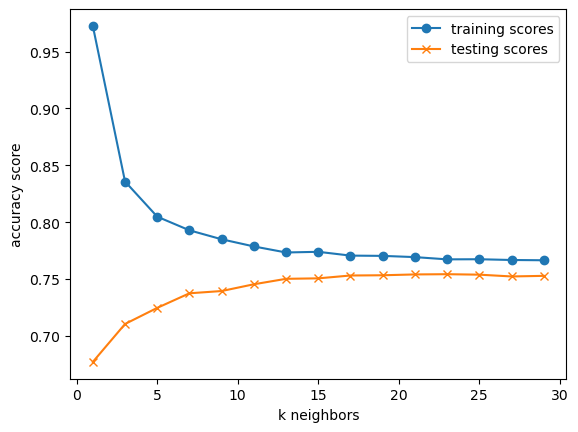

In [12]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

### KNN Model

In [18]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
print('k=27 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=27 Test Acc: 0.752


### Bag and Boost Models

In [19]:
# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {gbc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gbc.score(X_test_scaled, y_test)}')

Training Score: 0.7683142867067283
Testing Score: 0.7695113056163384


In [20]:
# Train the AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {abc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {abc.score(X_test_scaled, y_test)}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Score: 0.7596998853728855
Testing Score: 0.7665937272064187
